# Import the libraries used in the project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

DATA_DIR = './data' #You many change the directory

# Reading the datasets: Users, Events, Transactions

In [3]:
users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

# Pre-processing of the datasets

In [4]:
users.head()

,user_id,gender,canton,class_level
0,387604,NaN,NaN,NaN
1,387605,NaN,NaN,NaN
2,387608,NaN,NaN,NaN
3,387615,MALE,SG,Gymnasium - 3. Jahr
4,387643,NaN,NaN,NaN


In [5]:
users.columns

Index(['user_id', 'gender', 'canton', 'class_level'], dtype='object')

In [6]:
events.head()

,event_id,user_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data
0,62,393211,1621583814885,TASK,VIEW_QUESTION,VIEW,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
1,63,393211,1621583898912,TASK,SUBMIT_ANSWER,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
2,64,393211,1621583907207,TASK,NEXT,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
3,65,393211,1621583907589,TASK,VIEW_QUESTION,VIEW,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN
4,66,393211,1621584222588,TASK,SUBMIT_ANSWER,CLICK,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN


## How to change the timestamp to normal time and date

## This function return the week (or year) of the year based on  the timestamp 

In [7]:
from datetime import date

def convert_epoch_time_to_week_of_the_year(epoch_time_in_miliseconds):
    d = date.fromtimestamp(epoch_time_in_miliseconds / 1000)
    week = int(d.strftime('%U'))
    year = int(d.strftime('%Y'))
    if year==2022:
        week = week + 48
        
    return int(week)

print(convert_epoch_time_to_week_of_the_year(1621584325174)) #test
print(convert_epoch_time_to_week_of_the_year(1645519936855)) #test

20
56


## Minimum and maximum time in the events dataset are:

In [8]:
print(datetime.datetime.fromtimestamp(min(events['timestamp']) / 1000).strftime('%c'))

print(datetime.datetime.fromtimestamp(max(events['timestamp']) / 1000).strftime('%c'))

Fri May 21 09:56:54 2021
Tue Feb 22 09:52:16 2022


In [9]:
events.columns

Index(['event_id', 'user_id', 'timestamp', 'category', 'action', 'event_type',
       'transaction_token', 'session_id', 'tracking_data'],
      dtype='object')

In [10]:
transactions.head()

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type
0,1061991,cf99b0d7-279a-4ae0-8ef3-a15514e350b6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637146446763,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
1,1066631,13e3086b-1c4e-4d28-87a3-0582ccf495c6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637233737283,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
2,1011975,6f292166-86bd-4ec9-81e8-22e9033d571e,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636444658255,1.636445e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE
3,1020790,79a7d731-a36b-4529-a11b-108b9f877a04,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636561847705,1.636562e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE
4,1061970,a45b6464-371e-47f4-842c-34f9e345b4ec,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1637146373965,1.637146e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE


## Minimum and maximum time in the transactions dataset are:

In [11]:
print(datetime.datetime.fromtimestamp(min(transactions['start_time']) / 1000).strftime('%c'))

print(datetime.datetime.fromtimestamp(max(transactions['start_time']) / 1000).strftime('%c'))

Sat Oct 17 10:30:17 2020
Tue Feb 22 09:59:44 2022


## Therefore the starting point of the events dataset and transactions are different

In [12]:
transactions.columns

Index(['transaction_id', 'transaction_token', 'user_id', 'document_id',
       'document_version', 'evaluation', 'input', 'start_time', 'commit_time',
       'user_agent', 'validation', 'solution', 'type'],
      dtype='object')

## With the code below we can see that 1986 users are exist in events but not in transactions and 2366 users exist in transactions and not in events. Before cleaning there are:
## In users dataset there are 13695 distict participants,
## In events dataset there are 10113 distict participants,
## In transactions dataset there are 10493 distict participants.

In [13]:
id_unique_users = np.unique(users['user_id'])
print('Distinct participants based on "users" dataset: ',len(id_unique_users))
id_unique_events = np.unique(events['user_id'])
print('Distinct participants based on "events" dataset: ',len(id_unique_events))
id_unique_transactions = np.unique(transactions['user_id'])
print('Distinct participants based on "transactions" dataset: ',len(id_unique_transactions))

Distinct participants based on "users" dataset:  13695
Distinct participants based on "events" dataset:  10113
Distinct participants based on "transactions" dataset:  10493


In [14]:
user_unique_event    = set(events['user_id'].unique())
user_unique_trans    = set(transactions['user_id'].unique())
users_missing_i      = list(user_unique_event - user_unique_trans)
print('Num users exist in events but not in trans', len(users_missing_i))
users_missing_ii     = list(user_unique_trans-user_unique_event)
print('Num users exist in trans but not in events', len(users_missing_ii))

Num users exist in events but not in trans 1986
Num users exist in trans but not in events 2366


## With the code below we can see that based on the tokens there are some 1304 users that are present in the events table and users table and not in the transaction table. The reason is that bese on the timestamp, there is a gap between recording the events and transactions file. I remove them by the code below.

In [15]:
def remove_users(events, transactions):
    tokens_event = set(events['transaction_token'].unique())
    print("{} tokens in events".format(len(tokens_event)))

    tokens_trans = set(transactions['transaction_token'].unique())
    print("{} tokens in transactions".format(len(tokens_trans)))

    missing_tokens = list(tokens_event - tokens_trans)
    missing_tokens.remove(np.nan)
    print("{} tokens in events but not in transactions".format(len(missing_tokens)))

    users_missing = list(events[events['transaction_token'].isin(missing_tokens)]['user_id'].unique())
    print("{} users in events but not in transactions".format(len(users_missing)))

    # Events without missing users. Equivalent to removing the missing tokens from events.
    len_events = len(events)
    events = events[~events['user_id'].isin(users_missing)]
    stat_events = (len_events - len(events))/len_events
    print("{}% of events eliminated".format(round(stat_events, 4)))

    return events, transactions

events, transactions = remove_users(events, transactions)

637678 tokens in events
800018 tokens in transactions
37685 tokens in events but not in transactions
1304 users in events but not in transactions
0.0595% of events eliminated


## Since in task 3 and 4, the datasets (events and transactions) should be consistant, therefore, I removed all the users who are JUST in events or who are JUST in transactions.

In [16]:
def remove_users(events, transactions):
    user_id_event = set(events['user_id'].unique())
    user_id_trans = set(transactions['user_id'].unique())

    users_missing = list(user_id_event - user_id_trans)
    users_missing_ii = list( user_id_trans- user_id_event)
    
    events = events[~events['user_id'].isin(users_missing)]
    transactions = transactions[~transactions['user_id'].isin(users_missing)]
    
    events = events[~events['user_id'].isin(users_missing_ii)]
    transactions = transactions[~transactions['user_id'].isin(users_missing_ii)]
    
    return events, transactions

events, transactions = remove_users(events, transactions)

## Now we can see that the unique users in events and transactions are same.

In [17]:
len(events['user_id'].unique())

8127

In [18]:
len(transactions['user_id'].unique())

8127

# **Task 1: Simple Statistics**
# In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

## a) How many distinct participants do we have in the data set?


## We have three different datasets and based on each we have different distict participants: After "**cleaning up**" the dataset:
## In users dataset there are 13695 distict participants,
## In events dataset there are 8127 distict participants,
## In transactions dataset there are 8127 distict participants.

In [19]:
print('shape of users matrix: ',np.shape(users))
print('shape of events matrix: ',np.shape(events))
print('shape of transactions matrix: ',np.shape(transactions))

shape of users matrix:  (13695, 4)
shape of events matrix:  (3244494, 9)
shape of transactions matrix:  (695491, 13)


In [20]:
id_unique_users = np.unique(users['user_id'])
print('distinct participants based on "users" dataset: ',len(id_unique_users))

distinct participants based on "users" dataset:  13695


In [21]:
id_unique_events = np.unique(events['user_id'])
print('distinct participants based on "events" dataset: ',len(id_unique_events))

distinct participants based on "events" dataset:  8127


In [22]:
id_unique_transactions = np.unique(transactions['user_id'])
print('distinct participants based on "transactions" dataset: ',len(id_unique_transactions))

distinct participants based on "transactions" dataset:  8127


# b) How many transactions were done per user? Please provide a visualization and discuss the distribution.

## One can see the number of transaction per users in the DataFrame below:

In [23]:
counts_user_id = transactions.user_id.value_counts(dropna=False)
counts_user_id=pd.DataFrame({"user_id": counts_user_id.index, "Count": counts_user_id.tolist()})
display(counts_user_id)
print('min number of transactions: ',min(counts_user_id['Count']))
print('max number of transactions: ',max(counts_user_id['Count']))

,user_id,Count
0,396334.0,1723
1,394780.0,1491
2,394913.0,1372
3,401331.0,1338
4,394677.0,1262
...,...,...
8122,394173.0,1
8123,393861.0,1
8124,403199.0,1
8125,395510.0,1


min number of transactions:  1
max number of transactions:  1723


## Minimum number of transactions is 1 and maximum is 1723 by user id: 396334

In [24]:
import scipy as sp
from scipy import stats
from scipy.stats import skewnorm, chi2_contingency
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder 

def test_normality(data):
    k2, p = stats.normaltest(data)
    alpha = 0.01
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

## As you can see the distribution of number of transactions is **not** normal distribution and instead it follows a exponential distribution.
## An exponential distribution is fit on the data to verity it and as you can see the fit is good enough.

p = 0
The null hypothesis can be rejected


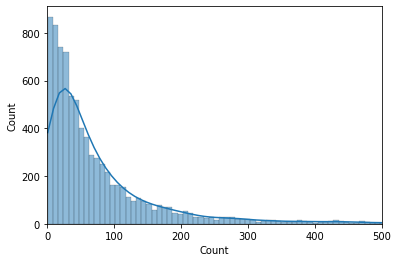

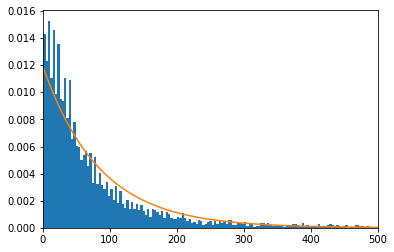

In [25]:
test_normality(counts_user_id['Count'])
sns.histplot(data=counts_user_id, x = 'Count',kde=True)  #, bins=10
plt.xlim(0, 500)
plt.show()
import scipy.stats as ss
P = ss.expon.fit(counts_user_id['Count'])
rX = np.linspace(0,500, 500)
rP = ss.expon.pdf(rX, *P)
plt.hist(counts_user_id['Count'], density=True, bins=500)
plt.plot(rX, rP)
plt.xlim(0, 500)
plt.show()

# c) Which are the 10 most popular event actions? Please provide a visualization of the frequency of the top 10 event actions.


In [26]:
transactions_evaluation_counts = transactions.evaluation.value_counts(dropna=False)
transactions_evaluation_counts=pd.DataFrame({"evaluation": transactions_evaluation_counts.index, "Count": transactions_evaluation_counts.tolist()})
display(transactions_evaluation_counts)

,evaluation,Count
0,NaN,261312
1,CORRECT,206798
2,PARTIAL,173760
3,WRONG,53621


In [27]:
events_action_counts = events.action.value_counts(dropna=False)
events_action_counts=pd.DataFrame({"actions": events_action_counts.index, "Count": events_action_counts.tolist()})
display(events_action_counts)

,actions,Count
0,PAGE_VISIT,597089
1,REVIEW_TASK,484304
2,SUBMIT_ANSWER,392997
3,NAVIGATE_DASHBOARD,344190
4,NEXT,251256
5,WINDOW_VISIBLE_FALSE,220639
6,WINDOW_VISIBLE_TRUE,183102
7,VIEW_QUESTION,145992
8,OPEN_FEEDBACK,86672
9,GO_TO_THEORY,79253


## The most frequent events actions are:

In [28]:
ten_most_freq_events_action= events_action_counts.head(10)
display(ten_most_freq_events_action)

,actions,Count
0,PAGE_VISIT,597089
1,REVIEW_TASK,484304
2,SUBMIT_ANSWER,392997
3,NAVIGATE_DASHBOARD,344190
4,NEXT,251256
5,WINDOW_VISIBLE_FALSE,220639
6,WINDOW_VISIBLE_TRUE,183102
7,VIEW_QUESTION,145992
8,OPEN_FEEDBACK,86672
9,GO_TO_THEORY,79253


## The Visulalization of the ten most frequent events actions are:

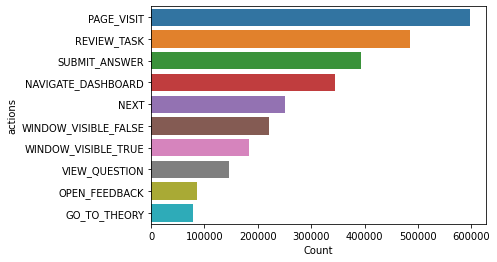

In [29]:
sns.barplot(data= ten_most_freq_events_action, y = 'actions', x ='Count')
plt.xlabel("Count")
plt.ylabel("actions")
plt.show()

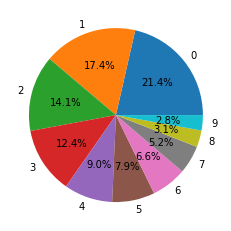

In [30]:
val_counts = ten_most_freq_events_action.Count/np.sum(ten_most_freq_events_action.Count.value_counts())
labels = val_counts.index.to_list()
plt.pie(val_counts, labels = labels,autopct='%1.1f%%')
plt.show()

# **Task 2: Static Analysis**
## In this second task, you will do a univariate an multivariate exploration of some aggregated features.
## a) Build a data frame containing one row per user:
### [user_id, gender, num_events, num_questions, percentage_correct, num_reading]
### The features are defined as follows:
### num_questions: total number of questions the student answered (hint: action event = submit answer)
### num_events: total number of events of the student
### percentage_correct: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers.
### num_reading: total number of theory reading events (hint: action event = go to theory)

In [31]:
evaluation = transactions.evaluation.value_counts(dropna=False)
pd.DataFrame({"evaluation": evaluation.index, "Count": evaluation.tolist() })

,evaluation,Count
0,NaN,261312
1,CORRECT,206798
2,PARTIAL,173760
3,WRONG,53621


## With the code below we can calculate the parameters (num_questions, num_events, percentage_correct, num_reading). Since my code is not written efficienty therefore it is super slow si I saved the outputs and load them when it is needed.

In [32]:
# counter=0
# sub_ans = []
# tot_ans=[]
# tot_eval=[]
# corr=[]
# partial=[]
# goTOtheory=[]

# for ids in users['user_id']:
    
#     counter = (counter +1)
#     print(counter)
#     temp=events['action'].where(events['user_id']==ids)
#     temp=pd.DataFrame({"result": temp.tolist()})
#     temp_ii=transactions['evaluation'].where(events['user_id']==ids)
#     temp_ii=pd.DataFrame({"result": temp_ii.tolist()})
    
#     tot_ans.append(temp.size - temp.isna().sum())
#     sub_ans.append(sum(temp['result'] == 'SUBMIT_ANSWER'))
#     goTOtheory.append(sum(temp['result'] == 'GO_TO_THEORY'))
#     tot_eval.append(temp_ii.size - temp_ii.isna().sum())
#     corr.append(sum(temp_ii['result'] == 'CORRECT'))
#     partial.append(sum(temp_ii['result'] == 'PARTIAL'))

In [33]:
# np.save('data_sub_ans.npy', sub_ans)
# np.save('data_tot_ans.npy', tot_ans)
# np.save('data_tot_eval.npy', tot_eval)
# np.save('data_corr.npy', corr)
# np.save('data_partial.npy', partial)
# np.save('data_goTOtheory.npy', goTOtheory)

In [34]:
new_sub_ans    = np.load('data_sub_ans.npy') # load
new_tot_ans    = np.load('data_tot_ans.npy') # load
new_tot_eval   = np.load('data_tot_eval.npy') # load
new_corr       = np.load('data_corr.npy') # load
new_partial    = np.load('data_partial.npy') # load
new_goTOtheory = np.load('data_goTOtheory.npy') # load

## The outputs are like:

In [35]:
print('Number of total evaluations for each user: ', new_tot_eval)
print('Number of totally correct answers for each user: ', new_corr)
print('Number of partial correct answers for each user: ', new_partial)

print('Number of submit answer for each user: ', new_sub_ans)
print('Number of total answers for each user: ', new_tot_ans)
print('Number of go to theory for each user: ', new_goTOtheory)

Number of total evaluations for each user:  [[ 763]
 [1240]
 [  98]
 ...
 [   0]
 [   0]
 [   0]]
Number of totally correct answers for each user:  [352 656  49 ...   0   0   0]
Number of partial correct answers for each user:  [316 414  41 ...   0   0   0]
Number of submit answer for each user:  [ 97 217  54 ...   4   0   0]
Number of total answers for each user:  [[2606]
 [3331]
 [ 866]
 ...
 [  43]
 [  22]
 [  37]]
Number of go to theory for each user:  [368  33  23 ...   0   0   5]


In [36]:
flat_new_tot_ans = new_tot_ans.flatten()
flat_new_tot_eval = new_tot_eval.flatten()

In [37]:
import warnings
warnings.filterwarnings('ignore')
num_events = np.array(flat_new_tot_ans)
num_question = np.array(new_sub_ans)
num_reading = np.array(new_goTOtheory)
percentage_correct = (np.array(new_corr) + 0.5*np.array(new_partial))/np.array(flat_new_tot_eval)

In [38]:
print(np.shape(num_events))
print(np.shape(num_question))
print(np.shape(num_reading))
print(np.shape(percentage_correct))

(13695,)
(13695,)
(13695,)
(13695,)


In [39]:
pd.set_option('precision', 2)
feature_list = [users['user_id'], users['gender'],num_question,num_events,percentage_correct,num_reading]

## Here is the dataframe we are looking for:

In [40]:
desc_stats_df = pd.DataFrame(feature_list, index =['user_id', 'gender','num_question','num_events','percentage_correct','num_reading'])
my_desc_stats_df = desc_stats_df.T
my_desc_stats_df['percentage_correct'] = my_desc_stats_df['percentage_correct'].fillna(0)
display(my_desc_stats_df)

,user_id,gender,num_question,num_events,percentage_correct,num_reading
0,387604.0,NaN,97.0,2606.0,0.67,368.0
1,387605.0,NaN,217.0,3331.0,0.70,33.0
2,387608.0,NaN,54.0,866.0,0.71,23.0
3,387615,MALE,15,492,0.69,10
4,387643.0,NaN,0.0,4.0,0.00,0.0
...,...,...,...,...,...,...
13690,404600.0,NaN,0.0,0.0,0.00,0.0
13691,404603,FEMALE,13,112,0.00,0
13692,404604,FEMALE,4,43,0.00,0
13693,404605,FEMALE,0,22,0.00,0


## b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_events, num_questions, percentage_correct, num_reading) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [41]:
feature_list_prime = [users['user_id'], users['gender'],num_question,num_events,percentage_correct,num_reading,users['canton'],users['class_level']]
desc_stats_df_prime = pd.DataFrame(feature_list_prime, index =['user_id', 'gender','num_question','num_events','percentage_correct','num_reading','canton','class_level'])
my_desc_stats_df_prime = desc_stats_df_prime.T
my_desc_stats_df_prime['percentage_correct'] = my_desc_stats_df_prime['percentage_correct'].fillna(0)
my_desc_stats_df_prime['num_question'] = my_desc_stats_df_prime['num_question'].fillna(0)
my_desc_stats_df_prime['num_events'] = my_desc_stats_df_prime['num_events'].fillna(0)
my_desc_stats_df_prime['num_reading'] = my_desc_stats_df_prime['num_reading'].fillna(0)

display(my_desc_stats_df_prime)

,user_id,gender,num_question,num_events,percentage_correct,num_reading,canton,class_level
0,387604.0,NaN,97.0,2606.0,0.67,368.0,NaN,NaN
1,387605.0,NaN,217.0,3331.0,0.70,33.0,NaN,NaN
2,387608.0,NaN,54.0,866.0,0.71,23.0,NaN,NaN
3,387615,MALE,15.0,492.0,0.69,10.0,SG,Gymnasium - 3. Jahr
4,387643.0,NaN,0.0,4.0,0.00,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
13690,404600.0,NaN,0.0,0.0,0.00,0.0,NaN,NaN
13691,404603,FEMALE,13.0,112.0,0.00,0.0,SO,Gymnasium - 4. Jahr
13692,404604,FEMALE,4.0,43.0,0.00,0.0,ZH,Langzeitgymnasium - 2. Jahr
13693,404605,FEMALE,0.0,22.0,0.00,0.0,SO,Gymnasium - 3. Jahr


## Distribution of the data are like: The number of question, number of events and number of reading follows an exponential or power law distribution while the percentage correct (with considering the partial correct with half point) is follwoing an Gaussian distribution.

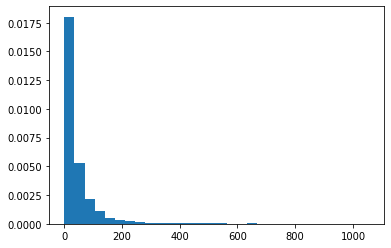

In [42]:
plt.hist(my_desc_stats_df_prime['num_question'][my_desc_stats_df_prime['num_question'] != 0], density=True, bins=30)
plt.show()

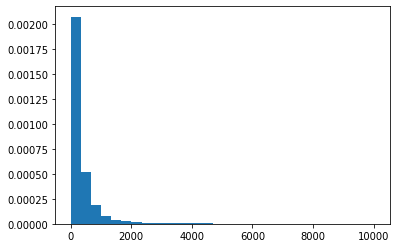

In [43]:
plt.hist(my_desc_stats_df_prime['num_events'][my_desc_stats_df_prime['num_events'] != 0], density=True, bins=30)
plt.show()

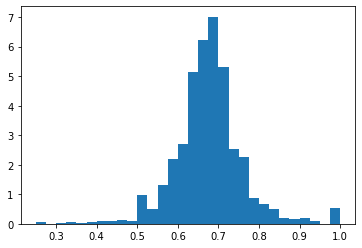

In [44]:
plt.hist(my_desc_stats_df_prime['percentage_correct'][my_desc_stats_df_prime['percentage_correct'] != 0], density=True, bins=30)
plt.show()

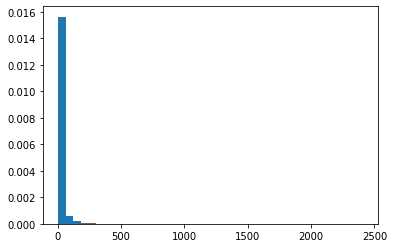

In [45]:
plt.hist(my_desc_stats_df_prime['num_reading'][my_desc_stats_df_prime['num_reading'] != 0], density=True, bins=40)
plt.show()

## For the numerical numbers we can do univariate analysis by studying the mean, median and mode to know about center of data and other calculations (see in table below) to know about spread of data.

## The mean value of number of question is 29 with median of 5 and it not in the middle of dataset since minimum is 0 and maximum is 1054. It is the same for number of events.

In [46]:
from scipy import stats
pd.set_option('precision', 2)
feature_list = [my_desc_stats_df_prime['num_question'], my_desc_stats_df_prime['num_events'], my_desc_stats_df_prime['percentage_correct'],
       my_desc_stats_df_prime['num_reading']]

data = {'Mean': np.mean(feature_list,1),
        'Median':np.median(feature_list,1),
        'Mode': (stats.mode(feature_list,axis=1)[0])[:,0],
        'Variance':np.var(feature_list,1),
        'Std':np.std(feature_list,1),
        'Minimum': np.min(feature_list,1),
        '25%': np.percentile(feature_list, 25, axis=1),
        '75%': np.percentile(feature_list, 75, axis=1),
        'Maximum': np.max(feature_list,1)}
desc_stats_df = pd.DataFrame(data, index =['num_question', 'num_events', 'percentage_correct',
       'num_reading'])

display(desc_stats_df)

,Mean,Median,Mode,Variance,Std,Minimum,25%,75%,Maximum
num_question,28.70,5.0,0.0,4674.84,68.37,0.0,0.0,30.0,1054.0
num_events,237.98,71.0,0.0,271113.73,520.69,0.0,0.0,260.0,10044.0
percentage_correct,0.17,0.0,0.0,0.09,0.30,0.0,0.0,0.5,1.0
num_reading,5.84,0.0,0.0,1039.29,32.24,0.0,0.0,2.0,2404.0


## For Categorical and ordinal data the barchart and pie chart is used below.
## Maximum class level is Gymnasium with 19.9% of the total data.

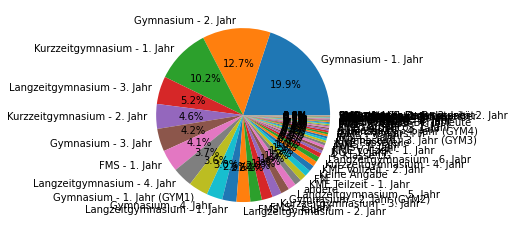

In [47]:
val_counts = my_desc_stats_df_prime.class_level.value_counts()/np.sum(my_desc_stats_df_prime.class_level.value_counts())
labels = val_counts.index.to_list()
plt.pie(val_counts, labels = labels,autopct='%1.1f%%')
plt.show()

## same plot here is used just the representation is different.

[Text(0.5, 0, 'canton'), Text(0, 0.5, 'Count')]

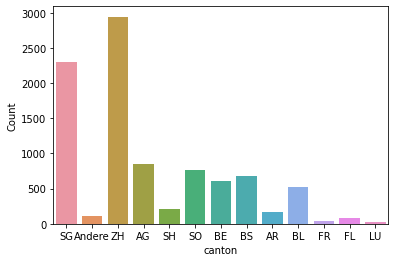

In [48]:
ax = sns.countplot(data=my_desc_stats_df_prime, x= 'canton')
ax.set(xlabel='canton', ylabel='Count')

## The maximum users are belongs to canton Zurich (ZH) and make sence since it has more population and the rest is illustrated with a pie chart:

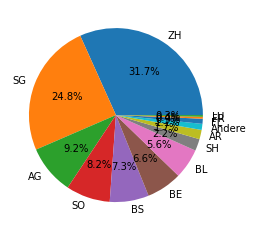

In [49]:
val_counts = my_desc_stats_df_prime.canton.value_counts()/np.sum(my_desc_stats_df_prime.canton.value_counts())
labels = val_counts.index.to_list()
plt.pie(val_counts, labels = labels,autopct='%1.1f%%')
plt.show()

## Female are more active in the website rather than male as shown below:

[Text(0.5, 0, 'gender'), Text(0, 0.5, 'Count')]

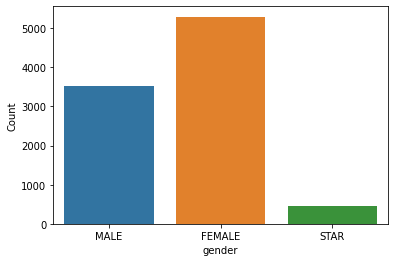

In [50]:
ax = sns.countplot(data=my_desc_stats_df_prime, x= 'gender')
ax.set(xlabel='gender', ylabel='Count')

# Multivariate analysis

## Relation between numerical variables can be seen with scatter plot. Below there are three scatter plot corresponds to number of "question versus number of events" which shows a linear relation between them which make sence, "number of question versus percentage of correct", and "number of reading versus the percentage of correct answers" which both has kind of normal distribution.

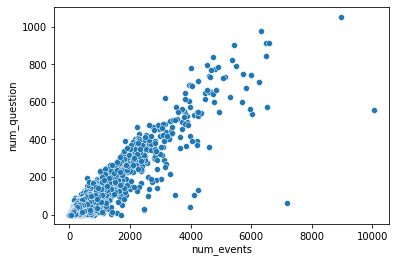

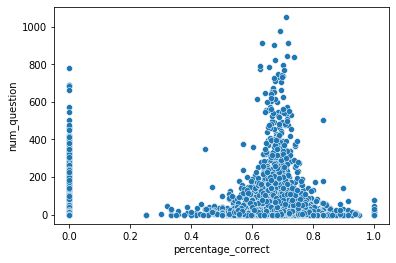

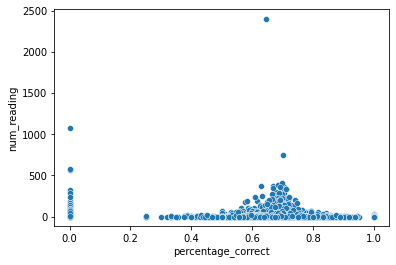

In [51]:
sns.scatterplot(data= my_desc_stats_df, y = 'num_question', x ='num_events')
plt.xlabel("num_events")
plt.ylabel("num_question")
plt.show()

sns.scatterplot(data= my_desc_stats_df, y = 'num_question', x ='percentage_correct')
plt.xlabel("percentage_correct")
plt.ylabel("num_question")
plt.show()

sns.scatterplot(data= my_desc_stats_df, y = 'num_reading', x ='percentage_correct')
plt.xlabel("percentage_correct")
plt.ylabel("num_reading")
plt.show()

## Relation between numerical & categorical variable

## We make distinguish between genders here to see if gender has a effect or not and the answer is **no**.

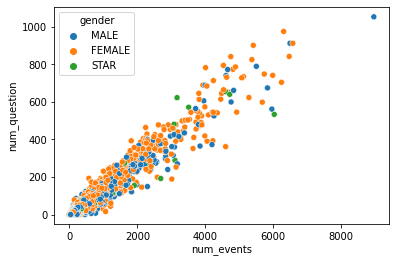

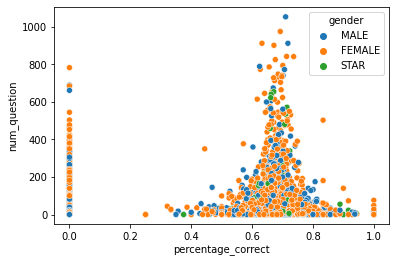

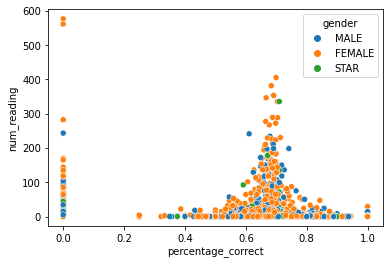

In [52]:
sns.scatterplot(data= my_desc_stats_df, y = 'num_question', x ='num_events', hue='gender')
plt.xlabel("num_events")
plt.ylabel("num_question")
plt.show()

sns.scatterplot(data= my_desc_stats_df, y = 'num_question', x ='percentage_correct', hue='gender')
plt.xlabel("percentage_correct")
plt.ylabel("num_question")
plt.show()

sns.scatterplot(data= my_desc_stats_df, y = 'num_reading', x ='percentage_correct', hue='gender')
plt.xlabel("percentage_correct")
plt.ylabel("num_reading")
plt.show()

## But about effect on canton on the data, we can see that for example canton BL has more contribution on the website. We can seek the reason on the number of schools in that conton.

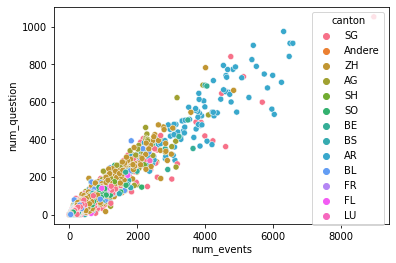

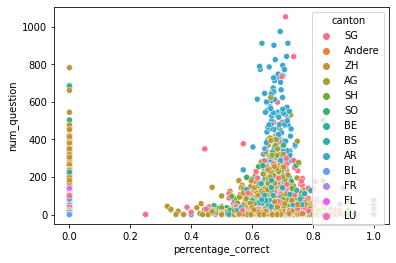

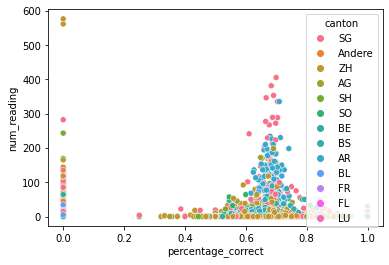

In [53]:
sns.scatterplot(data= my_desc_stats_df, y = 'num_question', x ='num_events', hue= users['canton'])
plt.xlabel("num_events")
plt.ylabel("num_question")
plt.show()

sns.scatterplot(data= my_desc_stats_df, y = 'num_question', x ='percentage_correct', hue= users['canton'])
plt.xlabel("percentage_correct")
plt.ylabel("num_question")
plt.show()

sns.scatterplot(data= my_desc_stats_df, y = 'num_reading', x ='percentage_correct', hue= users['canton'])
plt.xlabel("percentage_correct")
plt.ylabel("num_reading")
plt.show()

## Effect of class levels is seen here which says the class level "Gymnasium-3,Jahr" more contribution but the behavior of the data is same like all the classes has same mean percentage correct and follows a Gussian distribution.

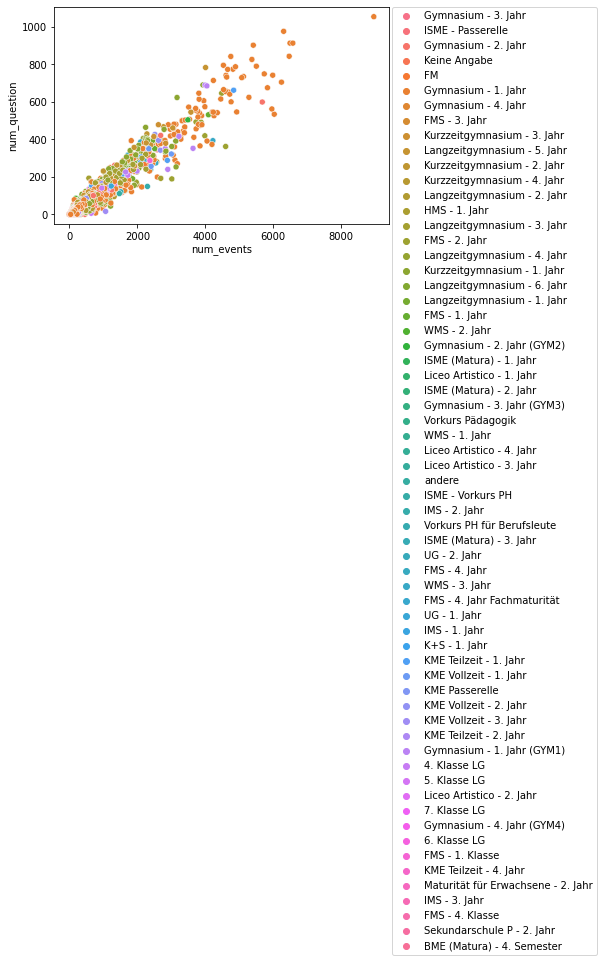

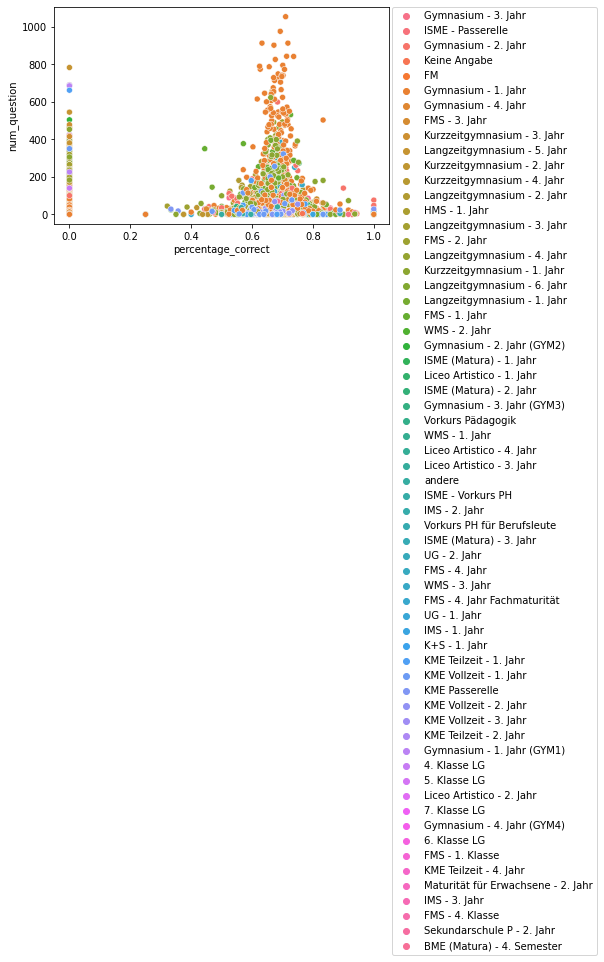

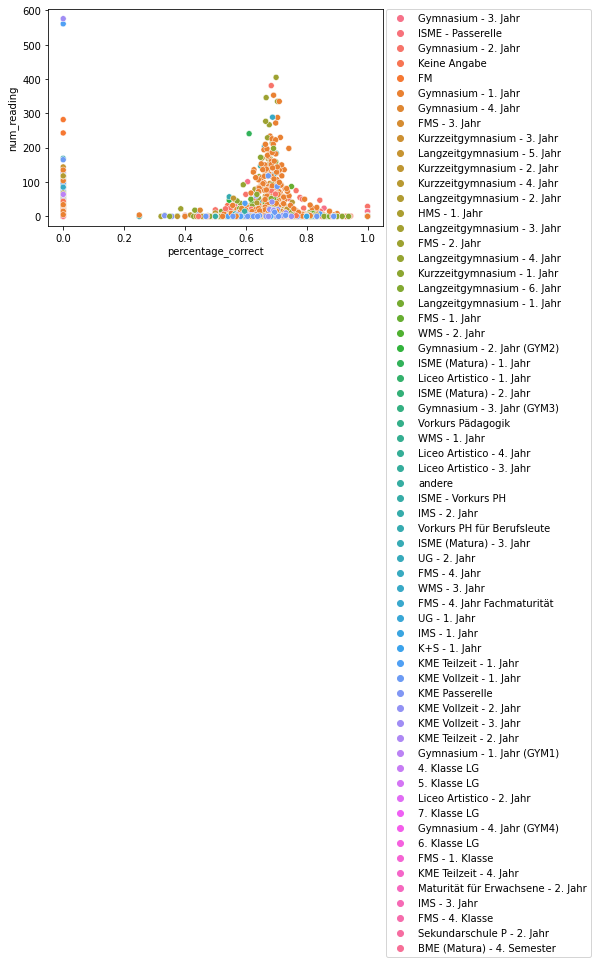

In [54]:
sns.scatterplot(data= my_desc_stats_df, y = 'num_question', x ='num_events', hue= users['class_level'])
plt.xlabel("num_events")
plt.ylabel("num_question")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

sns.scatterplot(data= my_desc_stats_df, y = 'num_question', x ='percentage_correct', hue= users['class_level'])
plt.xlabel("percentage_correct")
plt.ylabel("num_question")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

sns.scatterplot(data= my_desc_stats_df, y = 'num_reading', x ='percentage_correct',hue= users['class_level'])
plt.xlabel("percentage_correct")
plt.ylabel("num_reading")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

## Percentage correct by gender: following a normal distribution. We can see that the top point of the female distribution is higher than top point of the male distribution and but has same variance.

In [55]:
def plot_by_gender(feature, ylim, xlim, bins):
    
    f, axarr = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

    sns.histplot(data= my_desc_stats_df, x  =feature, hue='gender', ax = axarr[0], bins=bins, binrange = (0,xlim))
    axarr[0].set(title='Both', ylim=(0,ylim),  xlim=(0,xlim))
    
    sns.histplot(data= my_desc_stats_df[my_desc_stats_df.gender=='FEMALE'], x  = feature,color='orange',  ax = axarr[1], bins=bins, binrange = (0,xlim))
    axarr[1].set(title='Female', ylim=(0, ylim),  xlim=(0,xlim))

    sns.histplot(data= my_desc_stats_df[my_desc_stats_df.gender=='MALE'], x  = feature,  ax = axarr[2], bins=bins, binrange = (0,xlim))
    axarr[2].set(title='Male', ylim=(0,ylim),  xlim=(0,xlim))
    plt.show()

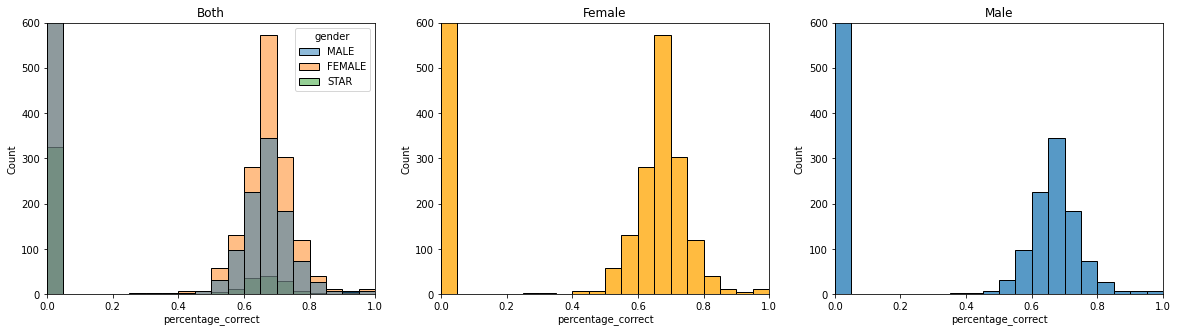

In [56]:
plot_by_gender('percentage_correct', ylim = 600, xlim = 1, bins =20)

## num_reading by gender: seems following a exponential distribution.

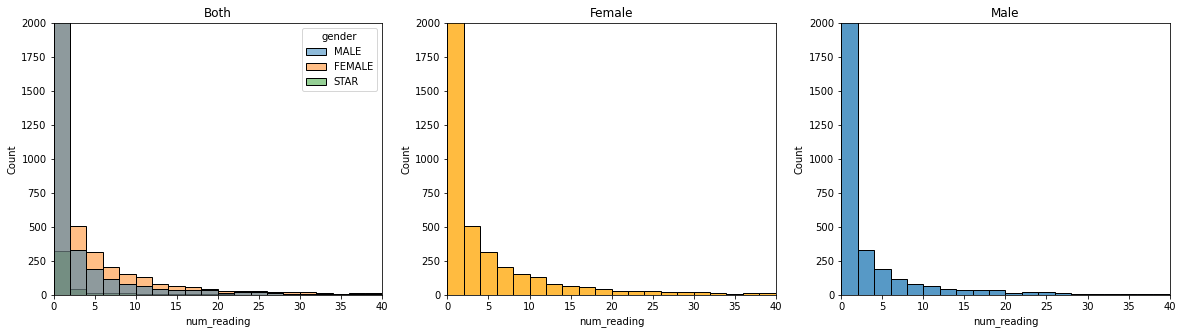

In [57]:
plot_by_gender('num_reading', 2000, 40, bins=20)

# In this section, the correlation between two variables is studies:

In [58]:
# Correlation between variables (pairwise comparisonn)
r, p = stats.pearsonr(my_desc_stats_df['num_events'], my_desc_stats_df['percentage_correct'])
print(r, p)

r, p = stats.pearsonr(my_desc_stats_df['num_reading'], my_desc_stats_df['percentage_correct'])
print(r, p)

0.3076004442919884 6.231398434581177e-298
0.14924238160040118 4.812695585521047e-69


## Mutual Information: For instance two category of gender and canton is considered:

In [59]:
categorical_x = 'gender'
categorical_y = 'canton'

counts_x = my_desc_stats_df_prime[categorical_x].value_counts()
dx = pd.DataFrame((counts_x/ (counts_x.sum()))).reset_index()
dx.columns = [categorical_x, 'px']
dx

,gender,px
0,FEMALE,0.57
1,MALE,0.38
2,STAR,0.05


In [60]:
counts_y = my_desc_stats_df_prime[categorical_y].value_counts()
dy = pd.DataFrame(counts_y/ (counts_y.sum())).reset_index()
dy.columns = [categorical_y, 'py']
dy

,canton,py
0,ZH,3.17e-01
1,SG,2.48e-01
2,AG,9.16e-02
3,SO,8.21e-02
4,BS,7.26e-02
5,BE,6.60e-02
6,BL,5.59e-02
7,SH,2.21e-02
8,AR,1.73e-02
9,Andere,1.12e-02


## Mutual Information - between canton and gender which shows not a high correlation between them.

In [61]:
counts_xy = my_desc_stats_df_prime[[categorical_x, categorical_y]].value_counts()
d_xy = pd.DataFrame((counts_xy/ (counts_xy.sum()))).reset_index()
d_xy.columns = [categorical_x, categorical_y, 'pxy']
d_xy

,gender,canton,pxy
0,FEMALE,ZH,1.70e-01
1,FEMALE,SG,1.51e-01
2,MALE,ZH,1.31e-01
3,MALE,SG,8.89e-02
4,FEMALE,AG,5.54e-02
5,FEMALE,SO,4.72e-02
6,FEMALE,BE,4.14e-02
7,FEMALE,BS,3.98e-02
8,MALE,AG,3.28e-02
9,MALE,SO,3.19e-02


## In all of the cantons the number of female users are higher than men.

<AxesSubplot:xlabel='canton', ylabel='count'>

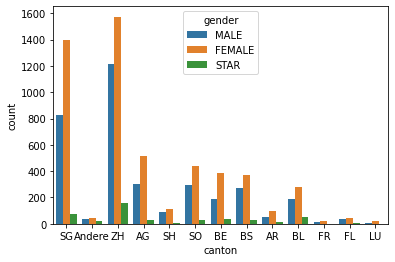

In [62]:
sns.countplot(data = my_desc_stats_df_prime, x = 'canton', hue= 'gender' )

In [63]:
def mutual_information_discrete(df, categorical_x, categorical_y):

    counts_xy = df[[categorical_x, categorical_y]].value_counts()
    d_xy = pd.DataFrame((counts_xy/ (counts_xy.sum()))).reset_index()
    d_xy.columns = [categorical_x, categorical_y, 'pxy']

    counts_x = df[categorical_x].value_counts()
    dx = pd.DataFrame((counts_x/ (counts_x.sum()))).reset_index()
    dx.columns = [categorical_x, 'px']

    counts_y = df[categorical_y].value_counts()
    dy = pd.DataFrame(counts_y/ (counts_y.sum())).reset_index()
    dy.columns = [categorical_y, 'py']

    d_mi = d_xy.merge(dx, on=categorical_x, how='left').merge(dy, on=categorical_y, how='left')

    mi = 0
    for i, row in d_mi.iterrows():
        if row['pxy']>0:
            mi += row['pxy']*np.log(row['pxy']/(row['px']*row['py']))

    return mi


mutual_information_discrete(my_desc_stats_df_prime, categorical_x, categorical_y)

0.0073730087881430815

## Verification

In [64]:
df_mi = my_desc_stats_df_prime[(~my_desc_stats_df_prime[categorical_x].isna() & ~my_desc_stats_df_prime[categorical_y].isna())]
x= LabelEncoder().fit_transform(df_mi[categorical_x]).reshape(-1, 1)
y= LabelEncoder().fit_transform(df_mi[categorical_y]).ravel()

mutual_info_classif(x, y, discrete_features=True)

array([0.00737301])

# c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

## My code takes time to run therefore I saved the outputs and load them when its needed.

In [65]:
# counter=0
# OPEN_FEEDBACK = []
# NEXT=[]
# REVIEW_TASK=[]

# for ids in users['user_id']:
    
#     counter = (counter +1)
#     print(counter)
#     temp=events['action'].where(events['user_id']==ids)
#     temp=pd.DataFrame({"result": temp.tolist()})
    
#     OPEN_FEEDBACK.append(sum(temp['result'] == 'OPEN_FEEDBACK')) 
#     NEXT.append(sum(temp['result'] == 'NEXT'))
#     REVIEW_TASK.append(sum(temp['result'] == 'REVIEW_TASK'))

In [66]:
# np.save('data_OPEN_FEEDBACK.npy', OPEN_FEEDBACK)
# np.save('data_NEXT.npy', NEXT)
# np.save('data_REVIEW_TASK.npy', REVIEW_TASK)

In [67]:
# print(REVIEW_TASK)

In [68]:
data_OPEN_FEEDBACK  = np.load('data_OPEN_FEEDBACK.npy') # load
data_NEXT           = np.load('data_NEXT.npy')          # load
data_REVIEW_TASK    = np.load('data_REVIEW_TASK.npy')   # load

## I chosed "open_feedback", "Next" and "review task" 
## H1: If a user open the feedback means the user cares about her/his mistakes and it is not a random user. The gender and canton should not effect the results and its distribution should be like expoential.
## H2: I chosed also "Next" since who press next is learning more and more and should get a better percentage of correct. The gender and canton should not effect the results and its distribution should be like expoential. Mean value of "Next" should be higher than mean value of number of "feedbacks".
## H3: Also I chosed the third variable "review task" which means the user if learning from mistakes perhaps and should progress more than others (the bahavioe should be same as open_feedback). The gender and canton should not effect the results and its distribution should be like expoential.

## I am going to just verify H1 and H2.

In [69]:
my_desc_stats_df_prime['OPEN_FEEDBACK'] = data_OPEN_FEEDBACK
my_desc_stats_df_prime['NEXT']          = data_NEXT
my_desc_stats_df_prime['REVIEW_TASK']   = data_REVIEW_TASK
display(my_desc_stats_df_prime)

,user_id,gender,num_question,num_events,percentage_correct,num_reading,canton,class_level,OPEN_FEEDBACK,NEXT,REVIEW_TASK
0,387604.0,NaN,97.0,2606.0,0.67,368.0,NaN,NaN,0,76,168
1,387605.0,NaN,217.0,3331.0,0.70,33.0,NaN,NaN,70,96,313
2,387608.0,NaN,54.0,866.0,0.71,23.0,NaN,NaN,3,18,81
3,387615,MALE,15.0,492.0,0.69,10.0,SG,Gymnasium - 3. Jahr,1,15,25
4,387643.0,NaN,0.0,4.0,0.00,0.0,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13690,404600.0,NaN,0.0,0.0,0.00,0.0,NaN,NaN,0,0,0
13691,404603,FEMALE,13.0,112.0,0.00,0.0,SO,Gymnasium - 4. Jahr,7,13,17
13692,404604,FEMALE,4.0,43.0,0.00,0.0,ZH,Langzeitgymnasium - 2. Jahr,0,0,8
13693,404605,FEMALE,0.0,22.0,0.00,0.0,SO,Gymnasium - 3. Jahr,0,0,0


# d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [70]:
my_desc_stats_df_prime['OPEN_FEEDBACK'] = my_desc_stats_df_prime['OPEN_FEEDBACK'].fillna(0)
my_desc_stats_df_prime['NEXT']   = my_desc_stats_df_prime['NEXT'].fillna(0)
my_desc_stats_df_prime['REVIEW_TASK']  = my_desc_stats_df_prime['REVIEW_TASK'].fillna(0)

## As we ecpecrted mean of open feedback is much less than mean of Next which is totally normal since the users mostly press next to go to the next question and not the feedback.

In [71]:
from scipy import stats
pd.set_option('precision', 2)
feature_list_2 = [my_desc_stats_df_prime['OPEN_FEEDBACK'], my_desc_stats_df_prime['NEXT'], my_desc_stats_df_prime['REVIEW_TASK']]

data2 = {'Mean': np.mean(feature_list_2,1),
        'Median':np.median(feature_list_2,1),
        'Mode': (stats.mode(feature_list_2,axis=1)[0])[:,0],
        'Variance':np.var(feature_list_2,1),
        'Std':np.std(feature_list_2,1),
        'Minimum': np.min(feature_list_2,1),
        '25%': np.percentile(feature_list_2, 25, axis=1),
        '75%': np.percentile(feature_list_2, 75, axis=1),
        'Maximum': np.max(feature_list_2,1)}
desc_stats_df_2 = pd.DataFrame(data2, index =['OPEN_FEEDBACK', 'NEXT', 'REVIEW_TASK'])

display(desc_stats_df_2)

,Mean,Median,Mode,Variance,Std,Minimum,25%,75%,Maximum
OPEN_FEEDBACK,6.33,0.0,0,523.34,22.88,0,0.0,2.0,412
NEXT,18.35,1.0,0,2153.28,46.40,0,0.0,18.0,687
REVIEW_TASK,35.36,7.0,0,6513.58,80.71,0,0.0,38.0,1231


## The distrubution of my two variables are exponential as expected which make sence since lots of users open the feedback for at least one time but not many for several times.

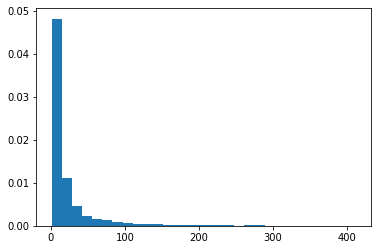

In [72]:
plt.hist(my_desc_stats_df_prime['OPEN_FEEDBACK'][my_desc_stats_df_prime['OPEN_FEEDBACK'] != 0], density=True, bins=30)
plt.show()

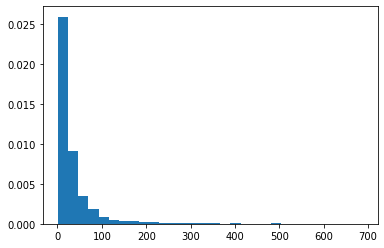

In [73]:
plt.hist(my_desc_stats_df_prime['NEXT'][my_desc_stats_df_prime['NEXT'] != 0], density=True, bins=30)
plt.show()

## My hypothesis H1 and H2 are not totally accurate (as you can see in the scatter plots of next question) since many users who got high percentage of the correct asnwer they did not open the feedback page too many times.

# e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

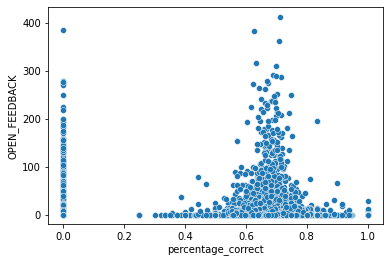

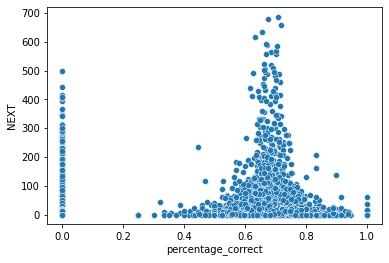

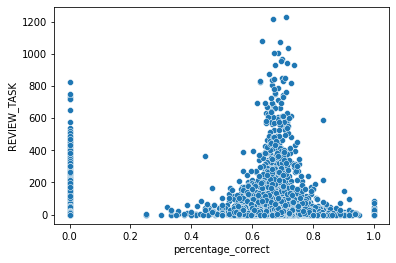

In [74]:
sns.scatterplot(data= my_desc_stats_df_prime, y = 'OPEN_FEEDBACK', x ='percentage_correct')
plt.xlabel("percentage_correct")
plt.ylabel("OPEN_FEEDBACK")
plt.show()

sns.scatterplot(data= my_desc_stats_df_prime, y = 'NEXT', x ='percentage_correct')
plt.xlabel("percentage_correct")
plt.ylabel("NEXT")
plt.show()

sns.scatterplot(data= my_desc_stats_df_prime, y = 'REVIEW_TASK', x ='percentage_correct')
plt.xlabel("percentage_correct")
plt.ylabel("REVIEW_TASK")
plt.show()

## My hypothesis H1 and H2 are not totally accurate (as you can see in the scatter plots of next question) since many users who got high percentage of the correct asnwer they did not open the feedback page too many times.

## The gender does not chnage the behavior of the data as mentioned in hypothesis H1 and H2:

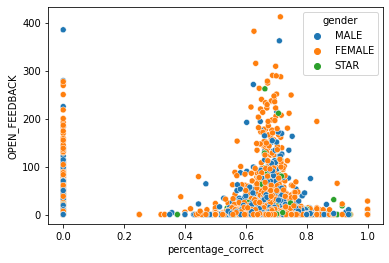

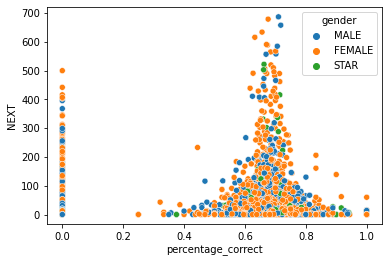

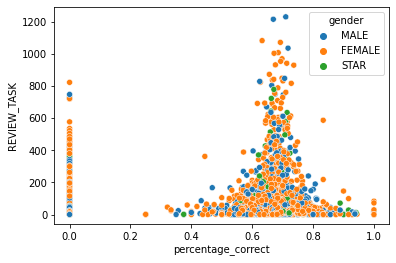

In [75]:
sns.scatterplot(data= my_desc_stats_df_prime, y = 'OPEN_FEEDBACK', x ='percentage_correct',hue='gender')
plt.xlabel("percentage_correct")
plt.ylabel("OPEN_FEEDBACK")
plt.show()

sns.scatterplot(data= my_desc_stats_df_prime, y = 'NEXT', x ='percentage_correct',hue='gender')
plt.xlabel("percentage_correct")
plt.ylabel("NEXT")
plt.show()

sns.scatterplot(data= my_desc_stats_df_prime, y = 'REVIEW_TASK', x ='percentage_correct',hue='gender')
plt.xlabel("percentage_correct")
plt.ylabel("REVIEW_TASK")
plt.show()

## The canton does not chnage the behavior of the data as mentioned in hypothesis H1 and H2:

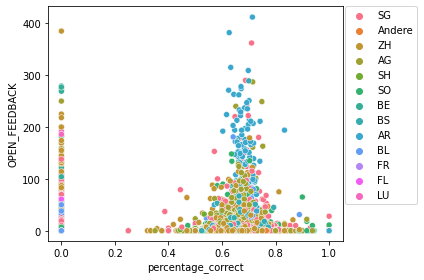

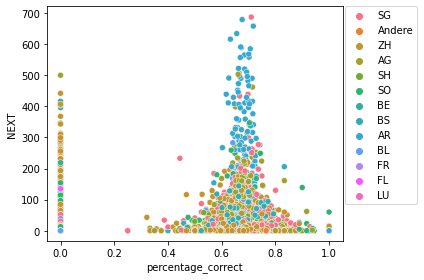

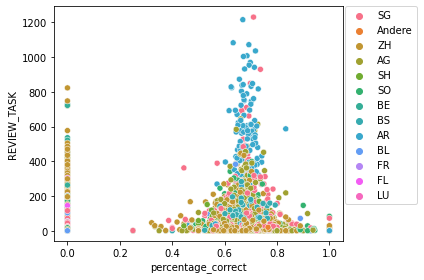

In [76]:
sns.scatterplot(data= my_desc_stats_df_prime, y = 'OPEN_FEEDBACK', x ='percentage_correct',hue='canton')
plt.xlabel("percentage_correct")
plt.ylabel("OPEN_FEEDBACK")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

sns.scatterplot(data= my_desc_stats_df_prime, y = 'NEXT', x ='percentage_correct',hue='canton')
plt.xlabel("percentage_correct")
plt.ylabel("NEXT")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

sns.scatterplot(data= my_desc_stats_df_prime, y = 'REVIEW_TASK', x ='percentage_correct',hue='canton')
plt.xlabel("percentage_correct")
plt.ylabel("REVIEW_TASK")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

# Task 3: Time-Series Analysis
### In the last task, you will perform a time-series analysis.

### a) Build a data frame containing one row per user per week:
### [user_id, week, num_events, num_questions, percentage_correct, num_reading]

### The features are defined as follows:

### num_questions: total number of questions the student answered per week(hint: action event = submit answer).

### num_events: total number of events of the student per week.

### percentage_correct: number of correct answers/total number of answers per week (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

### num_reading: total number of theory reading events per week (hint: action event = go to theory).

### Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

### Hint: You may extract the week of the year (dt.week) from the timestamps.

### You can limit the number of weeks to 13, i.e. for each user we just look at the first 13 weeks of data. Yoy may change and justify your choice for the number of weeks.

In [77]:
print(np.min(events['timestamp']))
print(np.max(events['timestamp']))

1621584325174
1645519936855


## In events dataset
## Maximum time is Tuesday, February 22, 2022
## Minimum time is Friday, May 21, 2021

## Here is my function to get the timestamp and return the week of the year

In [78]:
from datetime import date

def convert_epoch_time_to_week_of_the_year(epoch_time_in_miliseconds):
    d = date.fromtimestamp(epoch_time_in_miliseconds / 1000)
    week = int(d.strftime('%U'))
    year = int(d.strftime('%Y'))
    # print('year')
    if year==2022:
        #print('im here')
        week = week + 48
        
    return int(week)
# print(convert_epoch_time_to_week_of_the_year(1621584325174)) #test
# print(convert_epoch_time_to_week_of_the_year(1645519936855)) #test

In [79]:
week_time_events=[]
for timestamp in events['timestamp']:
    week_time_events.append(convert_epoch_time_to_week_of_the_year(timestamp)) 

In [80]:
week_time_events=np.array(week_time_events)

## the week is saved in column of the week in the events dataset

In [81]:
events['week'] = week_time_events.tolist()
events.head()

,event_id,user_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data,week
7,69,392476,1621584325174,TASK,VIEW_QUESTION,VIEW,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,33768.0,NaN,20
8,70,392476,1621584365975,TASK,VIEW_QUESTION,VIEW,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,33768.0,NaN,20
10,72,392476,1621584441478,TASK,VIEW_QUESTION,VIEW,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,33768.0,NaN,20
11,73,392476,1621584446771,TASK,GO_TO_THEORY,CLICK,46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7,33768.0,NaN,20
37,223,393213,1621589245107,TASK,VIEW_QUESTION,VIEW,54aaee3c-cad7-45da-a436-61fa51cedea3,34343.0,NaN,20


In [82]:
week_time_transactions=[]
for start_time in transactions['start_time']:
    week_time_transactions.append(convert_epoch_time_to_week_of_the_year(start_time)) 

In [83]:
week_time_transactions=np.array(week_time_transactions)

## the week is saved in column of the week in the transactions dataset

In [84]:
transactions['week'] = week_time_transactions.tolist()
display(transactions)

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type,week
0,1061991,cf99b0d7-279a-4ae0-8ef3-a15514e350b6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637146446763,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN,46
1,1066631,13e3086b-1c4e-4d28-87a3-0582ccf495c6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637233737283,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN,46
2,1011975,6f292166-86bd-4ec9-81e8-22e9033d571e,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636444658255,1.64e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,45
3,1020790,79a7d731-a36b-4529-a11b-108b9f877a04,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636561847705,1.64e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,45
4,1061970,a45b6464-371e-47f4-842c-34f9e345b4ec,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1637146373965,1.64e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800013,1585030,06d45030-3e4b-478a-ac7b-8ea1baaa72e5,404604.0,9wGXbOQkPdV6yr6aUa4ubj,89818,NaN,NaN,1645461301727,NaN,Mozilla/5.0 (Linux; Android 12; SAMSUNG SM-A72...,NaN,NaN,NaN,56
800014,1585034,cf5959df-cf20-459b-82f4-ebaea1c5d06b,404604.0,9wGXbOQkPdV6yr6aUa4ubj,89818,NaN,NaN,1645461326174,NaN,Mozilla/5.0 (Linux; Android 12; SAMSUNG SM-A72...,NaN,NaN,NaN,56
800015,1584551,7c9956b4-d2e2-4f30-9245-8155d6636bd5,404604.0,9wGXbOQkPdV6yr6aUa4ubj,89818,NaN,NaN,1645454941994,1.65e+12,unknown,SKIP,NaN,NaN,56
800016,1584578,7e328437-52df-4697-94e9-186844c3e269,404604.0,a1jzfZLIHDt7LzD8KKha54,39046,PARTIAL,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""3""...",1645455097067,1.65e+12,unknown,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,56


## using function of groupby based on user and week to make the time series

In [85]:
transactions_grouped=transactions.groupby(by=['user_id','week'], as_index=False).count()
transactions_grouped

,user_id,week,transaction_id,transaction_token,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type
0,387604.0,2,3,3,3,3,0,0,3,1,3,1,0,0
1,387604.0,5,1,1,1,1,0,0,1,0,1,0,0,0
2,387604.0,8,1,1,1,1,0,0,1,0,1,0,0,0
3,387604.0,9,1,1,1,1,0,0,1,0,1,0,0,0
4,387604.0,10,7,7,7,7,0,0,7,4,7,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24022,404597.0,56,3,3,3,3,1,1,3,1,1,1,1,1
24023,404598.0,56,3,3,3,3,1,1,3,1,1,1,1,1
24024,404599.0,56,5,5,5,5,1,1,5,1,3,1,1,1
24025,404603.0,56,17,17,17,17,13,13,17,16,17,16,13,13


In [86]:
events_grouped=events.groupby(by=['user_id','week'], as_index=False).count()
events_grouped

,user_id,week,event_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data
0,387604,20,1,1,1,1,1,1,0,0
1,387604,21,1,1,1,1,1,1,0,0
2,387604,25,7,7,7,7,7,3,3,3
3,387604,26,25,25,25,25,25,18,17,7
4,387604,31,12,12,12,12,12,0,0,11
...,...,...,...,...,...,...,...,...,...,...
23590,404597,56,95,95,95,95,95,9,6,85
23591,404598,56,225,225,225,225,225,8,4,211
23592,404599,56,169,169,169,169,169,10,5,158
23593,404603,56,112,112,112,112,112,62,65,63


In [87]:
transactions_grouped= pd.DataFrame(transactions_grouped)
transactions_grouped

,user_id,week,transaction_id,transaction_token,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type
0,387604.0,2,3,3,3,3,0,0,3,1,3,1,0,0
1,387604.0,5,1,1,1,1,0,0,1,0,1,0,0,0
2,387604.0,8,1,1,1,1,0,0,1,0,1,0,0,0
3,387604.0,9,1,1,1,1,0,0,1,0,1,0,0,0
4,387604.0,10,7,7,7,7,0,0,7,4,7,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24022,404597.0,56,3,3,3,3,1,1,3,1,1,1,1,1
24023,404598.0,56,3,3,3,3,1,1,3,1,1,1,1,1
24024,404599.0,56,5,5,5,5,1,1,5,1,3,1,1,1
24025,404603.0,56,17,17,17,17,13,13,17,16,17,16,13,13


In [88]:
events_grouped= pd.DataFrame(events_grouped)
events_grouped

,user_id,week,event_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data
0,387604,20,1,1,1,1,1,1,0,0
1,387604,21,1,1,1,1,1,1,0,0
2,387604,25,7,7,7,7,7,3,3,3
3,387604,26,25,25,25,25,25,18,17,7
4,387604,31,12,12,12,12,12,0,0,11
...,...,...,...,...,...,...,...,...,...,...
23590,404597,56,95,95,95,95,95,9,6,85
23591,404598,56,225,225,225,225,225,8,4,211
23592,404599,56,169,169,169,169,169,10,5,158
23593,404603,56,112,112,112,112,112,62,65,63


## the index of groups

In [89]:
index_transaction=transactions.groupby(by=['user_id','week'], as_index=False).indices.values()
list(list(index_transaction)[0])

[56, 101, 244]

In [90]:
index_events=events.groupby(by=['user_id','week'], as_index=False).indices.values()
list(list(index_events)[0])

[2893]

In [91]:
len(transactions['user_id'].unique())

8127

In [92]:
len(events['user_id'].unique())

8127

## testing my algorithm to know about if it is working correctly 

In [93]:
## test algorithm on transactions
# ids =387604
# index_prime = [2,5,65,85]
# temp = list(index_prime)
# num_temp = np.size(temp)
# temp_evaluation=transactions.iloc[temp].evaluation
# print(temp_evaluation)
# aa = temp_evaluation=="CORRECT"
# bb = temp_evaluation=="PARTIAL"
# (sum(aa)+0.5*sum(bb))/len(aa)

In [94]:
## test algorithm on events
# ids =387604
# index_prime = [2,5,65,85]
# temp = list(index_prime)
# num_temp = np.size(temp)
# temp_events=events.iloc[temp].action
# print(temp_events)
# aa = temp_events=="GO_TO_THEORY"
# bb = temp_events=="SUBMIT_ANSWER"
# print(sum(aa))
# print(sum(bb))
# len(temp_events)

## my main algorithm on transaction data is here which save the dataset and load them when it is needed

In [95]:
# main algorithm for transactions
# counter=0
# out1=[]
# out2=[]
# for ids in g['user_id']:
#     # print(counter)
#     temp = list(list(index_transaction)[counter])
#     num_temp = np.size(temp)
#     temp_evaluation=transactions.iloc[temp].evaluation
#     aa = temp_evaluation=="CORRECT"
#     bb = temp_evaluation=="PARTIAL"
#     out1.append(list(transactions.iloc[temp].week)[0])
#     out2.append((sum(aa)+0.5*sum(bb))/len(aa))
    
#     counter = (counter +1)

In [96]:
# np.save('out1.npy', out1)
# np.save('out2.npy', out2)
out1  = np.load('out1.npy') # load
out2  = np.load('out2.npy') # load

In [97]:
print(len(out1))
print(len(out2))

24027
24027


In [98]:
user_id= transactions_grouped['user_id']
print(len(user_id))
week= out1
print(len(week))
percentage_correct = out2
print(len(percentage_correct))

d = {'user_id':user_id,'week':week,'percentage_correct':percentage_correct}

24027
24027
24027


In [99]:
df_transactions = pd.DataFrame(d)
display(df_transactions)

,user_id,week,percentage_correct
0,387604.0,2,0.00
1,387604.0,5,0.00
2,387604.0,8,0.00
3,387604.0,9,0.00
4,387604.0,10,0.00
...,...,...,...
24022,404597.0,56,0.17
24023,404598.0,56,0.33
24024,404599.0,56,0.20
24025,404603.0,56,0.50


## my main algorithm on events data is here which save the dataset and load them when it is needed

In [100]:
# # main algorithm for events
# counter=0
# out3=[]
# out4=[]
# out5=[]
# out6=[]
# out7=[]
# out8=[]
# for ids in g['user_id']:
#     print(counter)
#     temp = list(list(index_events)[counter])
#     num_temp = np.size(temp)
#     temp_events=events.iloc[temp].action
#     aa = temp_events=="GO_TO_THEORY"
#     bb = temp_events=="SUBMIT_ANSWER"
#     cc = temp_events=="PAGE_VISIT"
#     dd = temp_events=="REVIEW_TASK"
#     out3.append(list(events.iloc[temp].week)[0])
#     out4.append(sum(aa))
#     out5.append(sum(bb))
#     out6.append(len(temp_events))
#     out7.append(sum(cc))
#     out8.append(sum(dd))
#     counter = (counter +1)

In [101]:
# np.save('out3.npy', out3)
# np.save('out4.npy', out4)
# np.save('out5.npy', out5)
# np.save('out6.npy', out6)
# np.save('out7.npy', out7)
# np.save('out8.npy', out8)

out3  = np.load('out3.npy') # load
out4  = np.load('out4.npy') # load
out5  = np.load('out5.npy') # load
out6  = np.load('out6.npy') # load
out7  = np.load('out7.npy') # load
out8  = np.load('out8.npy') # load

In [102]:
print(len(out3))
print(len(out4))
print(len(out5))
print(len(out6))
print(min(out6))
print(max(out6))

23595
23595
23595
23595
1
2881


In [103]:
user_id_events= events_grouped['user_id']
print(len(user_id_events))
week= out3
print(len(week))
go_to_theory_events = out4
print(len(go_to_theory_events))
submit_answer = out5
print(len(submit_answer))
all_actions = out6
print(len(all_actions))
page_visit = out7
print(len(page_visit))
review_task = out8
print(len(review_task))

d_events = {'user_id':user_id_events,'week':week,'go_to_theory_events':go_to_theory_events,'submit_answer':submit_answer,'all_actions':all_actions,'page_visit':page_visit,'review_task':review_task}

23595
23595
23595
23595
23595
23595
23595


In [104]:
df_events = pd.DataFrame(d_events)
display(df_events)

,user_id,week,go_to_theory_events,submit_answer,all_actions,page_visit,review_task
0,387604,20,0,0,1,0,0
1,387604,21,0,0,1,0,0
2,387604,25,0,0,7,0,0
3,387604,26,0,0,25,0,0
4,387604,31,0,0,12,3,0
...,...,...,...,...,...,...,...
23590,404597,56,8,1,95,46,6
23591,404598,56,15,1,225,82,5
23592,404599,56,38,1,169,66,5
23593,404603,56,0,13,112,18,17


## finding minimum week to substitude from the events week

In [105]:
df2=transactions.groupby(by=["user_id"], as_index=False).week.min()
df2
# df2.index.tolist()

,user_id,week
0,387604.0,2
1,387605.0,1
2,387608.0,0
3,387615.0,7
4,387643.0,42
...,...,...
8122,404597.0,56
8123,404598.0,56
8124,404599.0,56
8125,404603.0,56


In [106]:
df3=df_transactions.merge(df2, on='user_id')
df3

,user_id,week_x,percentage_correct,week_y
0,387604.0,2,0.00,2
1,387604.0,5,0.00,2
2,387604.0,8,0.00,2
3,387604.0,9,0.00,2
4,387604.0,10,0.00,2
...,...,...,...,...
24022,404597.0,56,0.17,56
24023,404598.0,56,0.33,56
24024,404599.0,56,0.20,56
24025,404603.0,56,0.50,56


In [107]:
df3['week_diff'] = df3['week_x'] - df3['week_y']
df3

,user_id,week_x,percentage_correct,week_y,week_diff
0,387604.0,2,0.00,2,0
1,387604.0,5,0.00,2,3
2,387604.0,8,0.00,2,6
3,387604.0,9,0.00,2,7
4,387604.0,10,0.00,2,8
...,...,...,...,...,...
24022,404597.0,56,0.17,56,0
24023,404598.0,56,0.33,56,0
24024,404599.0,56,0.20,56,0
24025,404603.0,56,0.50,56,0


In [108]:
df3.drop('week_x', inplace=True, axis=1)
df3.drop('week_y', inplace=True, axis=1)
df3

,user_id,percentage_correct,week_diff
0,387604.0,0.00,0
1,387604.0,0.00,3
2,387604.0,0.00,6
3,387604.0,0.00,7
4,387604.0,0.00,8
...,...,...,...
24022,404597.0,0.17,0
24023,404598.0,0.33,0
24024,404599.0,0.20,0
24025,404603.0,0.50,0


In [109]:
df4=df_events.merge(df2, on='user_id')
df4

,user_id,week_x,go_to_theory_events,submit_answer,all_actions,page_visit,review_task,week_y
0,387604,20,0,0,1,0,0,2
1,387604,21,0,0,1,0,0,2
2,387604,25,0,0,7,0,0,2
3,387604,26,0,0,25,0,0,2
4,387604,31,0,0,12,3,0,2
...,...,...,...,...,...,...,...,...
23590,404597,56,8,1,95,46,6,56
23591,404598,56,15,1,225,82,5,56
23592,404599,56,38,1,169,66,5,56
23593,404603,56,0,13,112,18,17,56


In [110]:
df4['week_diff'] = df4['week_x'] - df4['week_y']
df4

,user_id,week_x,go_to_theory_events,submit_answer,all_actions,page_visit,review_task,week_y,week_diff
0,387604,20,0,0,1,0,0,2,18
1,387604,21,0,0,1,0,0,2,19
2,387604,25,0,0,7,0,0,2,23
3,387604,26,0,0,25,0,0,2,24
4,387604,31,0,0,12,3,0,2,29
...,...,...,...,...,...,...,...,...,...
23590,404597,56,8,1,95,46,6,56,0
23591,404598,56,15,1,225,82,5,56,0
23592,404599,56,38,1,169,66,5,56,0
23593,404603,56,0,13,112,18,17,56,0


In [111]:
df4.drop('week_x', inplace=True, axis=1)
df4.drop('week_y', inplace=True, axis=1)
df4

,user_id,go_to_theory_events,submit_answer,all_actions,page_visit,review_task,week_diff
0,387604,0,0,1,0,0,18
1,387604,0,0,1,0,0,19
2,387604,0,0,7,0,0,23
3,387604,0,0,25,0,0,24
4,387604,0,0,12,3,0,29
...,...,...,...,...,...,...,...
23590,404597,8,1,95,46,6,0
23591,404598,15,1,225,82,5,0
23592,404599,38,1,169,66,5,0
23593,404603,0,13,112,18,17,0


In [112]:
df_total=df4.merge(df3, on='user_id')
df_total

,user_id,go_to_theory_events,submit_answer,all_actions,page_visit,review_task,week_diff_x,percentage_correct,week_diff_y
0,387604,0,0,1,0,0,18,0.00,0
1,387604,0,0,1,0,0,18,0.00,3
2,387604,0,0,1,0,0,18,0.00,6
3,387604,0,0,1,0,0,18,0.00,7
4,387604,0,0,1,0,0,18,0.00,8
...,...,...,...,...,...,...,...,...,...
117959,404597,8,1,95,46,6,0,0.17,0
117960,404598,15,1,225,82,5,0,0.33,0
117961,404599,38,1,169,66,5,0,0.20,0
117962,404603,0,13,112,18,17,0,0.50,0


In [113]:
users

,user_id,gender,canton,class_level
0,387604,NaN,NaN,NaN
1,387605,NaN,NaN,NaN
2,387608,NaN,NaN,NaN
3,387615,MALE,SG,Gymnasium - 3. Jahr
4,387643,NaN,NaN,NaN
...,...,...,...,...
13690,404600,NaN,NaN,NaN
13691,404603,FEMALE,SO,Gymnasium - 4. Jahr
13692,404604,FEMALE,ZH,Langzeitgymnasium - 2. Jahr
13693,404605,FEMALE,SO,Gymnasium - 3. Jahr


In [114]:
new_data_set_users=users.loc[:, users.columns.drop(['canton', 'class_level'])]
new_data_set_users=pd.DataFrame(new_data_set_users)
new_data_set_users

,user_id,gender
0,387604,NaN
1,387605,NaN
2,387608,NaN
3,387615,MALE
4,387643,NaN
...,...,...
13690,404600,NaN
13691,404603,FEMALE
13692,404604,FEMALE
13693,404605,FEMALE


## Finally my dataframe is ready to analysis

In [115]:
df_total_test=df_total.merge(new_data_set_users, on='user_id')
df_total_test

,user_id,go_to_theory_events,submit_answer,all_actions,page_visit,review_task,week_diff_x,percentage_correct,week_diff_y,gender
0,387604,0,0,1,0,0,18,0.00,0,NaN
1,387604,0,0,1,0,0,18,0.00,3,NaN
2,387604,0,0,1,0,0,18,0.00,6,NaN
3,387604,0,0,1,0,0,18,0.00,7,NaN
4,387604,0,0,1,0,0,18,0.00,8,NaN
...,...,...,...,...,...,...,...,...,...,...
117959,404597,8,1,95,46,6,0,0.17,0,NaN
117960,404598,15,1,225,82,5,0,0.33,0,MALE
117961,404599,38,1,169,66,5,0,0.20,0,NaN
117962,404603,0,13,112,18,17,0,0.50,0,FEMALE


# b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

## I decided to analysis more weeks than 13 weeks to get a better conlcusin of the bahavior of the users

## H1: The all actions by time should not vary too much since the users that like the website keep using it
## I see a drop in the actions of the users in week 20 of the year which should be because of holidays of the schools

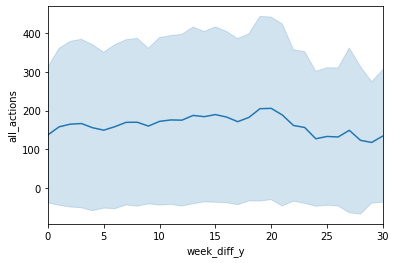

In [116]:
ax = sns.lineplot(data=df_total, x="week_diff_y", y="all_actions", ci='sd')
ax.set_xlim((0, 30))
plt.show()

## H2: There is no difference between males and females in terms of actions performed on the website.

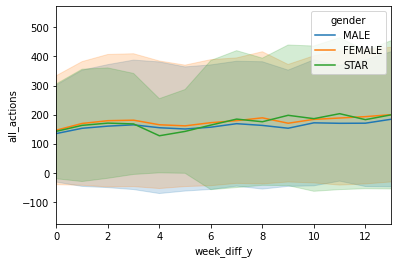

In [117]:
ax = sns.lineplot(data=df_total_test, x="week_diff_y", y="all_actions", ci='sd', hue = 'gender')
ax.set_xlim((0, 13))
plt.show()

## H3: Percentage correct should be around 50 percent becasue of the Gussian nature of the variable

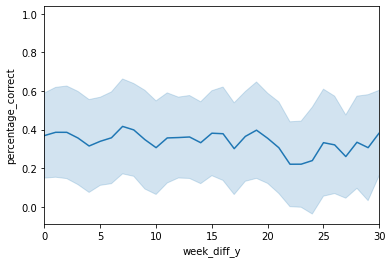

In [238]:
ax = sns.lineplot(data=df_total, x="week_diff_y", y="percentage_correct", ci='sd')
ax.set_xlim((0, 30))
plt.show()

## H4: There is no difference between males and females in terms of percentage correct and performance.

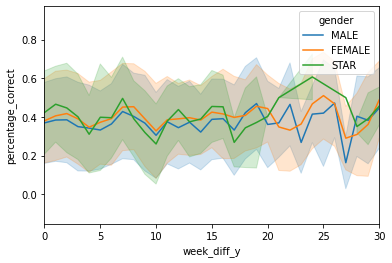

In [239]:
ax = sns.lineplot(data=df_total_test, x="week_diff_y", y="percentage_correct", ci='sd', hue = 'gender')
ax.set_xlim((0, 30))
plt.show()

# Task 4: Creative extension
## Please provide one new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?

## My new hypothesis is that page visit should not have a huge gradient like it should be constant since not many users join the website since its a local website for Switzerland. And of course there should not ba a difference between the gendrs.

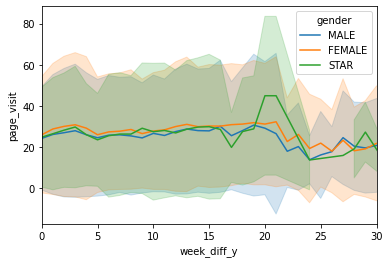

In [246]:
ax = sns.lineplot(data=df_total_test, x="week_diff_y", y="page_visit", ci='sd', hue = 'gender')
ax.set_xlim((0, 30))
plt.show()

In [252]:
df_total_test_finalii=df_total.merge(users, on='user_id')
df_total_test_finalii

,user_id,go_to_theory_events,submit_answer,all_actions,page_visit,review_task,week_diff_x,percentage_correct,week_diff_y,gender,canton,class_level
0,387604,0,0,1,0,0,18,0.00,0,NaN,NaN,NaN
1,387604,0,0,1,0,0,18,0.00,3,NaN,NaN,NaN
2,387604,0,0,1,0,0,18,0.00,6,NaN,NaN,NaN
3,387604,0,0,1,0,0,18,0.00,7,NaN,NaN,NaN
4,387604,0,0,1,0,0,18,0.00,8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
117959,404597,8,1,95,46,6,0,0.17,0,NaN,NaN,NaN
117960,404598,15,1,225,82,5,0,0.33,0,MALE,SG,Gymnasium - 1. Jahr
117961,404599,38,1,169,66,5,0,0.20,0,NaN,NaN,NaN
117962,404603,0,13,112,18,17,0,0.50,0,FEMALE,SO,Gymnasium - 4. Jahr


## my analysis show that one of the contons has more review task than other

In [256]:
len(df_total_test_finalii['canton'].unique())

14

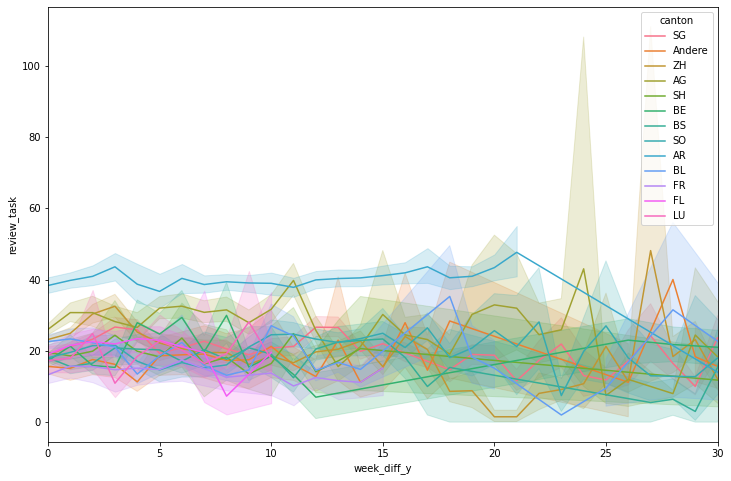

In [261]:
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=14)
plt.subplots(figsize=(12,10))
ax = sns.lineplot(data=df_total_test_finalii, x="week_diff_y", y="review_task", hue = 'canton')
sns.color_palette("Spectral", as_cmap=True)
ax.set_xlim((0, 30))
plt.show()

## The level of eduction in all the contns is almost equal since the studnets in different contons have equal mean of correct percentage.

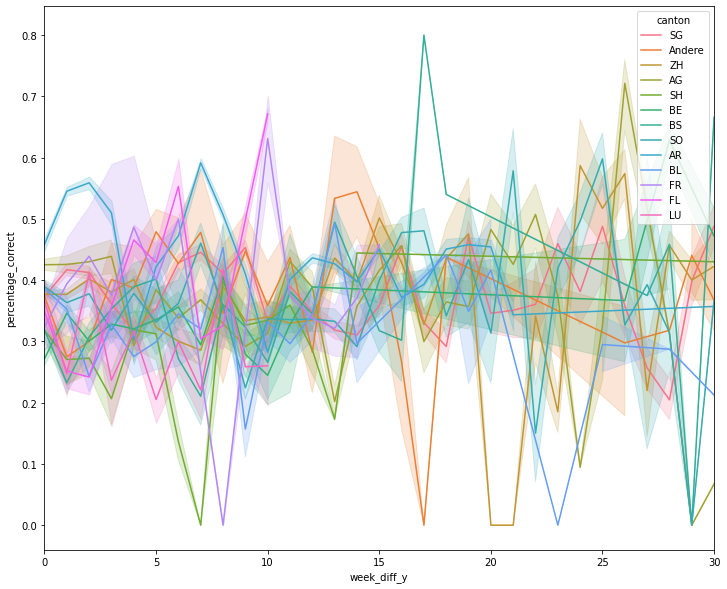

In [262]:
palette = sns.color_palette(cc.glasbey, n_colors=14)
plt.subplots(figsize=(12,10))
ax = sns.lineplot(data=df_total_test_finalii, x="week_diff_y", y="percentage_correct", hue = 'canton')
sns.color_palette("Spectral", as_cmap=True)
ax.set_xlim((0, 30))
plt.show()

## the scatter plot does not give me any especial trand between my variable

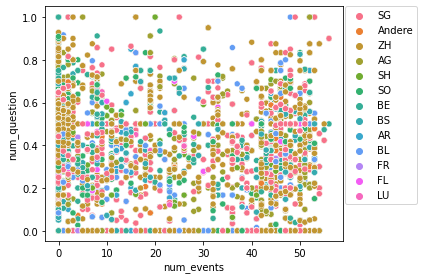

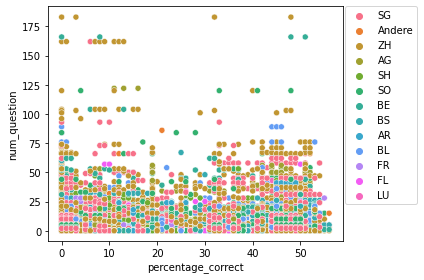

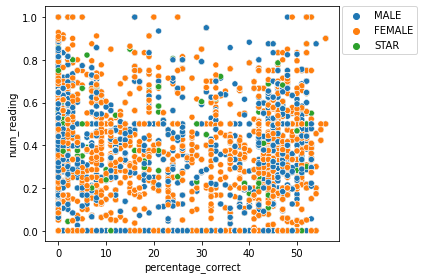

In [190]:
sns.scatterplot(data= df_total_test, y = 'percentage_correct', x ='week_diff_y', hue= users['canton'])
plt.xlabel("num_events")
plt.ylabel("num_question")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

sns.scatterplot(data= df_total_test, y = 'submit_answer', x ='week_diff_y', hue= users['canton'])
plt.xlabel("percentage_correct")
plt.ylabel("num_question")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

sns.scatterplot(data= df_total_test, y = 'percentage_correct', x ='week_diff_y', hue= users['gender'])
plt.xlabel("percentage_correct")
plt.ylabel("num_reading")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

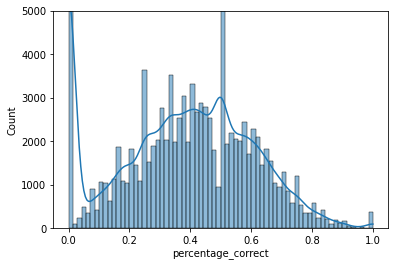

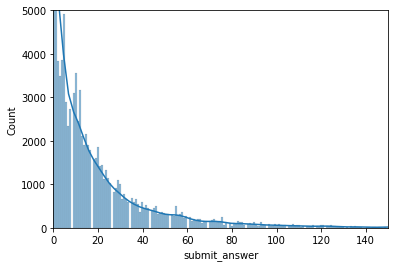

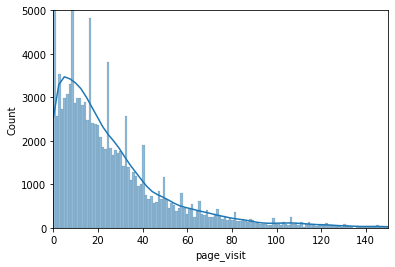

In [244]:
p1=sns.histplot(data=df_total_test, x = 'percentage_correct', kde=True) 
p1.set_ylim((0, 5000))
plt.show()

p2=sns.histplot(data=df_total_test, x = 'submit_answer', kde=True) 
p2.set_ylim((0, 5000))
p2.set_xlim((0, 150))
plt.show()

p3=sns.histplot(data=df_total_test, x = 'page_visit', kde=True) 
p3.set_ylim((0, 5000))
p3.set_xlim((0, 150))
plt.show()